In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('given_data.csv')

In [13]:
data.head()

,X,Y,X_normalized,Y_normalized,Predicted_Y_GD
0,89,21,0.933333,0.204301,0.446038
1,43,46,0.422222,0.473118,0.418770
2,36,3,0.344444,0.010753,0.414620
3,36,35,0.344444,0.354839,0.414620
4,95,67,1.000000,0.698925,0.449595


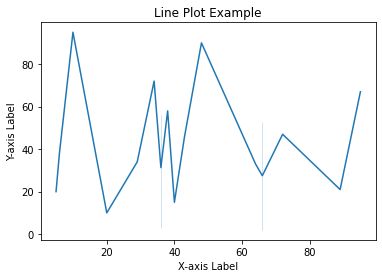

In [4]:
# Create a line plot using Seaborn
sns.lineplot(x=data['X'], y=data['Y'])

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot Example')

# Show the plot
plt.show()

In [5]:
data.shape

(20, 2)

In [6]:
data.head()

,X,Y
0,89,21
1,43,46
2,36,3
3,36,35
4,95,67


In [7]:
data.tail()

,X,Y
15,5,20
16,36,56
17,66,2
18,72,47
19,40,15


In [8]:
data.describe()

,X,Y
count,20.000000,20.000000
mean,42.950000,41.050000
std,25.508461,26.654663
min,5.000000,2.000000
25%,28.250000,20.750000
50%,37.000000,36.500000
75%,64.500000,56.500000
max,95.000000,95.000000


In [9]:
def compute_cost(b0, b1, data):
    """ Compute the cost function (Mean Squared Error). """
    total_error = 0.0
    for i in range(len(data)):
        x = data.iloc[i]['X_normalized']
        y = data.iloc[i]['Y_normalized']
        total_error += (y - (b1 * x + b0)) ** 2
    return total_error / len(data)

def step_gradient(b0_current, b1_current, data, learning_rate):
    """ Perform one step of gradient descent to update b0 and b1. """
    b0_gradient = 0
    b1_gradient = 0
    N = float(len(data))
    for i in range(len(data)):
        x = data.iloc[i]['X_normalized']
        y = data.iloc[i]['Y_normalized']
        b0_gradient += -(2/N) * (y - ((b1_current * x) + b0_current))
        b1_gradient += -(2/N) * x * (y - ((b1_current * x) + b0_current))
    new_b0 = b0_current - (learning_rate * b0_gradient)
    new_b1 = b1_current - (learning_rate * b1_gradient)
    return [new_b0, new_b1]

def gradient_descent_runner(data, starting_b0, starting_b1, learning_rate, num_iterations):
    """ Execute the gradient descent algorithm for a specified number of iterations. """
    b0 = starting_b0
    b1 = starting_b1
    for i in range(num_iterations):
        b0, b1 = step_gradient(b0, b1, data, learning_rate)
    return [b0, b1]

def normalize_data(data):
    """ Normalize data using min-max normalization """
    min_val = data.min()
    max_val = data.max()
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data, min_val, max_val



In [10]:
# Parameters for gradient descent
learning_rate = 0.01
initial_b0 = 0  # initial y-intercept guess
initial_b1 = 0  # initial slope guess
num_iterations = 1000

# Normalize 'X' and 'Y' columns separately
data['X_normalized'], min_x, max_x = normalize_data(data['X'])
data['Y_normalized'], min_y, max_y = normalize_data(data['Y'])

data.head()

,X,Y,X_normalized,Y_normalized
0,89,21,0.933333,0.204301
1,43,46,0.422222,0.473118
2,36,3,0.344444,0.010753
3,36,35,0.344444,0.354839
4,95,67,1.000000,0.698925


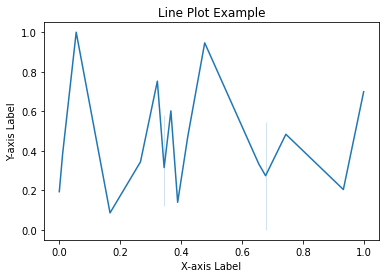

In [12]:
# Create a line plot using Seaborn
sns.lineplot(x=data['X_normalized'], y=data['Y_normalized'])

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot Example')

# Show the plot
plt.show()

In [11]:
# Running the gradient descent
b0, b1 = gradient_descent_runner(data, initial_b0, initial_b1, learning_rate, num_iterations)


data['Predicted_Y_GD'] = b1 * data['X_normalized'] + b0

'''
    R2 = 1−sum squared regression (SSR) total sum of squares (SST),= 1 − ∑(yi−yi^)2 ∑(yi−y¯)2. 
    The sum squared regression is the sum of the residuals squared, and the total sum of squares is the sum of 
    the distance the data is away from the mean all squared.
'''

SS_res = sum((data['Y_normalized'] - data['Predicted_Y_GD'])**2)
SS_tot = sum((data['Y_normalized'] - np.mean(data['Y_normalized']))**2)
r_squared = 1 - (SS_res/SS_tot)

r_squared

-0.0013952210832715028